<a href="https://colab.research.google.com/github/LeNovice/Dipin_Dissertation/blob/main/Base_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference 
https://github.com/LeNovice/Assignments_WILP_Sem1/blob/master/DM/Assignment1/dm_assignment.py

In [14]:
import pandas as pd
import numpy as np

In [15]:
raw_DF = pd.read_csv('https://raw.githubusercontent.com/LeNovice/Dipin_Dissertation/main/log_SNS_input.txt', header=None, dtype = np.float32)
#Remove last (64th) column
raw_DF.pop(raw_DF.columns[-1])
raw_DF.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1.500089e+09,4.249545e+09,2.450762e+09,2.139841e+08,173480032.0,8826471.0,936948544.0,60246012.0,1.785798e+09,3.343532e+09,...,167191264.0,90650112.0,222263968.0,168286288.0,277094688.0,84873952.0,238293792.0,202893296.0,178412032.0,77938096.0
1,4.798188e+07,5.331846e+07,4.980753e+07,1.696477e+06,535759008.0,11506403.0,213581296.0,48141116.0,1.513810e+05,5.745362e+06,...,78836424.0,226430576.0,152617632.0,165769008.0,74393840.0,197499280.0,149463568.0,141670800.0,196025296.0,193213344.0
2,6.870809e+07,7.239982e+07,7.766910e+07,4.149823e+08,287696064.0,182299120.0,13413323.0,478269984.0,1.843853e+08,6.710609e+05,...,87667696.0,205459760.0,206075936.0,188694432.0,195273120.0,81286680.0,188266464.0,192704352.0,185807984.0,187741696.0
3,1.409489e+07,2.815725e+07,3.233289e+06,6.975582e+07,398841696.0,19933028.0,3095912.5,283710784.0,8.665346e+07,1.199874e+08,...,184164592.0,212357152.0,269634624.0,142010976.0,204562912.0,207343408.0,155297808.0,136444304.0,162631696.0,211596880.0
4,5.993814e+07,3.164785e+07,6.877222e+07,8.817770e+07,5374798.0,52753524.0,48407240.0,404713408.0,3.852759e+07,1.371268e+08,...,173914768.0,188564304.0,209165104.0,240278048.0,194732992.0,104616376.0,148884480.0,127629880.0,175318896.0,161455232.0


In [16]:
out_raw_DF = pd.read_csv('https://raw.githubusercontent.com/LeNovice/Dipin_Dissertation/main/log_SNS_output.txt', header=None, dtype = np.float32)
#Remove last (64th) column
out_raw_DF.pop(out_raw_DF.columns[-1])
out_raw_DF.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,2.072660,2.072660,2.189288,2.442601,2.725224,3.040549,2.988405,2.587408,2.240218,1.939616,...,0.590095,0.553865,0.519860,0.487943,0.461921,0.441044,0.421112,0.402080,0.383908,0.366558
1,7.162985,7.162985,6.791173,6.104448,5.487164,4.932301,4.706109,4.766344,4.827348,4.889134,...,0.273589,0.282044,0.290760,0.299746,0.298462,0.287041,0.276056,0.265492,0.255333,0.245562
2,5.297450,5.297450,4.931717,4.274258,3.704446,3.210598,3.076568,3.259608,3.453537,3.659004,...,0.373314,0.369271,0.365272,0.361316,0.338543,0.300468,0.266676,0.236683,0.210064,0.186439
3,7.104992,7.104992,6.547114,5.559329,4.720575,4.008366,3.612230,3.454768,3.304169,3.160136,...,0.306025,0.334220,0.365013,0.398644,0.385116,0.329100,0.281232,0.240326,0.205371,0.175499
4,6.692630,6.692630,6.549850,6.273363,6.008549,5.754911,5.363054,4.862842,4.409286,3.998032,...,0.334568,0.308786,0.284990,0.263028,0.255800,0.262133,0.268623,0.275274,0.282090,0.289074


#Itzz Preprocessing time

Function to preprocess data
* Filling up unknown values with mean
* Normalization

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [18]:
def pre_process_data(raw_DF, out_raw_DF):
    #convert missing values to NaN
    raw_DF.replace(['?', '?\t', '\t?', ' '], np.nan, inplace=True)
    out_raw_DF.replace(['?', '?\t', '\t?', ' '], np.nan, inplace=True)

    numerical_columns = list(raw_DF.columns)
    output_numerical_columns = list(out_raw_DF.columns)

    #You may change the filling startegy here. If startegy is mean then the missing value will be replaced by the mean of the values (along the column).
    #Note that taking mean along column is not recommended for our project. But I do not find anything better.
    #Strategy choice: mean/median/mode/mostfrequent  etc.
    imputer_numeric = SimpleImputer(strategy='mean')

    #fit on raw data
    raw_DF[numerical_columns] = imputer_numeric.fit_transform(raw_DF[numerical_columns])
    out_raw_DF[output_numerical_columns] = imputer_numeric.fit_transform(out_raw_DF[output_numerical_columns])

    ########## This completes the first step of filling missing values ###########
    ########## Now we normalize Data #############
    #We will normalize the numerical data to have mean=0 and variance=1 here.
    #TODO: Practically, we split the training and testing data before normalizing the Dataset.
    #Actually the fit_transform method is used only on training data. This will generate the mean and std dev for the training data only.
    #Based on the Mean and stddev of training data, we normalize the test data (Precisely, test data should not affect the mean and stddev we calculate)
    #Here, due to time constraints, however we will take mean and stddev of entire DS. Should not affect much
    scaler = StandardScaler()
    raw_DF[numerical_columns] = scaler.fit_transform(raw_DF[numerical_columns])
    raw_DF = raw_DF.astype(float)
    out_raw_DF[output_numerical_columns] = scaler.fit_transform(out_raw_DF[output_numerical_columns])
    out_raw_DF = out_raw_DF.astype(float)

    return raw_DF, out_raw_DF

In [19]:
df, out_df = pre_process_data(raw_DF, out_raw_DF)

#Itzzz training time

In [20]:
from sklearn.model_selection import train_test_split
#split dataset into train and test.
#x_train, x_test, y_train, y_test = train_test_split(raw_DF, out_raw_DF, test_size=0.33)
x_train, x_test, y_train, y_test = train_test_split(df, out_df, test_size=0.33)

In [21]:
import tensorflow as tf
from tensorflow.keras import layers
#model building
from tensorflow.keras import models
import tensorflow.keras.utils as tfutils

Play with the model here

In [22]:
INPUT_NODES = 64
OUTPUT_NODES = 64

#Regularization 
#TODO: After you are able to overfit the data, start with these regularizers
reg = tf.keras.regularizers.L1L2(l1 =0.0, l2 = 0.0)

#TODO: Commented out ReLU activation as I do not know if intermediate values can or cannot be -ve

model = models.Sequential()

model.add(tf.keras.Input(shape=(INPUT_NODES,)))
model.add(layers.Dense(INPUT_NODES, kernel_initializer='he_uniform', kernel_regularizer = reg))
model.add(layers.BatchNormalization())
#model.add(layers.ReLU())

model.add(layers.Dense(32, kernel_initializer='he_uniform', kernel_regularizer = reg))
model.add(layers.BatchNormalization())
#model.add(layers.ReLU())

model.add(layers.Dense(16, kernel_initializer='he_uniform', kernel_regularizer = reg))
model.add(layers.BatchNormalization())
#model.add(layers.ReLU())

model.add(layers.Dense(32, kernel_initializer='he_uniform', kernel_regularizer = reg))
model.add(layers.BatchNormalization())
#model.add(layers.ReLU())

model.add(layers.Dense(64, kernel_initializer='he_uniform', kernel_regularizer = reg))
model.add(layers.BatchNormalization())
#model.add(layers.ReLU())

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_6 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_7 (Batc  (None, 16)              

Training happens below

In [24]:
Learning_Rate = 1e-5
opt = tf.keras.optimizers.Adam(learning_rate=Learning_Rate)

model.compile( optimizer = opt, loss = tf.keras.losses.MeanSquaredError(), metrics=['accuracy'] )

h = model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=5)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 1.6569 - accuracy: 0.0000e+00 - val_loss: 78.7717 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 27ms/step - loss: 1.6531 - accuracy: 0.0000e+00 - val_loss: 77.5624 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 31ms/step - loss: 1.6499 - accuracy: 0.0000e+00 - val_loss: 76.5586 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 34ms/step - loss: 1.6475 - accuracy: 0.0000e+00 - val_loss: 75.7287 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 32ms/step - loss: 1.6457 - accuracy: 0.0000e+00 - val_loss: 75.0486 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 34ms/step - loss: 1.6444 - accuracy: 0.0000e+00 - val_loss: 74.4994 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 30ms/step - loss: 1.6435 - accuracy: 0.0000e+00 - val_loss: 7

In [25]:
import matplotlib.pyplot as plt

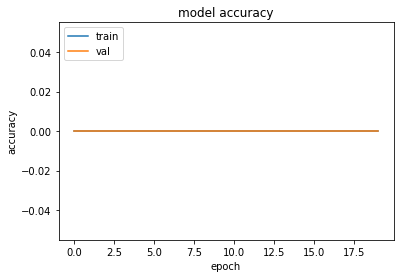

In [26]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

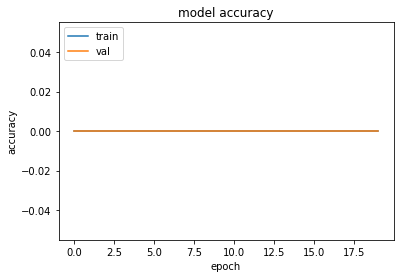

In [27]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()